<a href="https://colab.research.google.com/github/xogus2171-coder/DEU-Project/blob/main/final_exam_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>

# Problem 14

With the below dataset, you are asked to apply ANN to the multiclass classification problem. You are supposed to design your own ANN structure. Plot the linear classification boundaries.

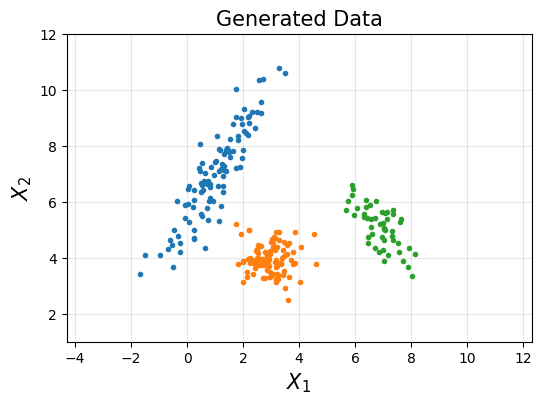

In [1]:
import numpy as np #넘파이 라이브러리 불러오기
import matplotlib.pyplot as plt #맷플롯립 라이브러리 불러오기

## generate three simulated clusters

mu1 = np.array([1, 7]) #(1,7) 배열 만들기
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]]) #2X2 공분산 행렬을 만들고 0.8배율로 축소
                       #전체적으로 덜 분산되도록
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100) #평균mu1, 공분산 SIGMA1를 갖는 100개 샘플 생성

mu2 = np.array([3, 4]) #(3,4) 배열 만들기
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]]) #2X2 공분산 행렬을 만들고 0.3배율로 축소
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100) #평균mu2, 공분산 SIGMA2를 갖는 100개 샘플 생성

mu3 = np.array([7, 5]) #(7,5) 배열 만들기
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]]) #2X2 공분산 행렬을 만들고 0.3배율로 축소
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50) #평균mu3, 공분산 SIGMA3를 갖는 50개 샘플 생성

## plot the data

plt.figure(figsize = (6, 4))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:, 0], X1[:, 1], '.') #X1이 (x,y)형태를 가진 100개의 데이터이므로 (모든 행:,첫 번째 열), (모든 행:,두 번째 열) 형태로 플롯
plt.plot(X2[:, 0], X2[:, 1], '.')#X2 역시 (x,y)형태를 가진 100개의 데이터이므로 (모든 행:,첫 번째 열), (모든 행:,두 번째 열) 형태로 플롯
plt.plot(X3[:, 0], X3[:, 1], '.')#X3 역시 (x,y)형태를 가진 50개의 데이터이므로 (모든 행:,첫 번째 열), (모든 행:,두 번째 열) 형태로 플롯
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 1, 12])
plt.show()

In [2]:
import keras

In [3]:
from sklearn.model_selection import train_test_split
X1_train, X1_test = train_test_split(X1, test_size=0.2, random_state=42) #X1 훈련세트와 검증세트로 나누기
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42) #X2 훈련세트와 검증세트로 나누기
X3_train, X3_test = train_test_split(X3, test_size=0.2, random_state=42) #X3 훈련세트와 검증세트로 나누기

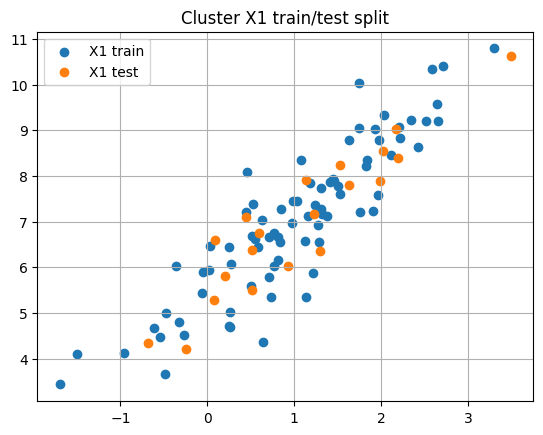

In [4]:
plt.scatter(X1_train[:,0], X1_train[:,1], label="X1 train")
plt.scatter(X1_test[:,0],  X1_test[:,1],  label="X1 test") #훈련세트와 검증세트 분포 산점도로 확인

plt.legend()
plt.title("Cluster X1 train/test split")
plt.grid()
plt.show()

In [5]:
# 라벨 생성
n1 = X1_train.shape[0]
n2 = X2_train.shape[0]
n3 = X3_train.shape[0]
Y1 = np.zeros(n1)   # class 0
Y2 = np.ones(n2)    # class 1
Y3 = np.full(n3, 2) # class 2 각 그룹으로 나누기

In [6]:
combined_train_data = np.concatenate((X1_train, X2_train, X3_train),axis=0) #훈련세트 합치기
combined_test_data = np.concatenate((X1_test, X2_test, X3_test),axis=0) #검증세트 합치기
combined_train_label = np.concatenate((Y1, Y2, Y3),axis=0) #라벨 합치기

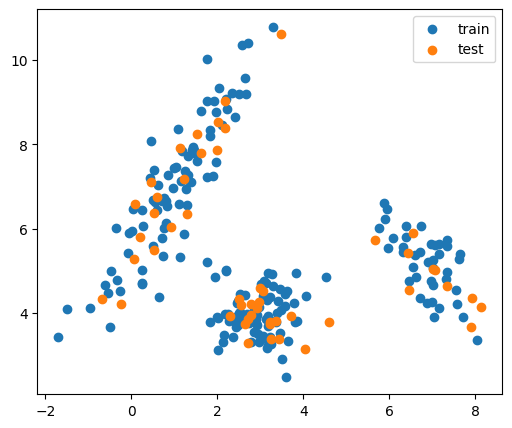

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(combined_train_data[:, 0], combined_train_data[:, 1],label='train') #훈련세트 산점도 확인
plt.scatter(combined_test_data[:, 0], combined_test_data[:, 1],label='test') #검증세트 산점도 확인
plt.legend()

In [8]:
inputs = keras.layers.Input(shape=(2,)) #inputs 데이터
dense1 = keras.layers.Dense(10, activation='sigmoid') #10개의 뉴런을 가진 밀집층
dense2 = keras.layers.Dense(3, activation='softmax') #출력층

In [9]:
model = keras.Sequential([inputs, dense1, dense2]) #입력층과 밀집층을 가진 신경망 모델 만들기_Sequnetial 클래스

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63 (252.00 B)

 Trainable params: 63 (252.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(combined_train_data,combined_train_label, epochs=100) #모델 훈련

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3653 - loss: 1.3439  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3590 - loss: 1.3015 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3842 - loss: 1.2427 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4005 - loss: 1.2038 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4050 - loss: 1.1753 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4320 - loss: 1.1306 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4064 - loss: 1.1416 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4044 - loss: 1.1145 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3874 - loss: 1.1197 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4157 - loss: 1.0942 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4173 - loss: 1.0795 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3693 - lo

In [12]:
test_point = np.array([[4, 4]]) #확인하려는 포인트 생성

In [13]:
prediction = model.predict(test_point) #예측하기
print(prediction) #(0,1,2) 중에 1번 값이 높으므로 1번 그룹에 속한다

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.06712841 0.59743154 0.33544   ]]


In [14]:
predicted_class = np.argmax(prediction, axis=1) #그룹으로 확인하기
print("Predicted class:", predicted_class) #1번 그룹에 속한다

Predicted class: [1]
